# Roots

Calculating square roots.

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

## Square Roots

We can check if $a$ is a square root of $b$ by multiplying $a$ by itself and comparing it to $b$.

$a = \sqrt{b} \Rightarrow a^2 = b$

In [2]:
# Two squared is four.
2 * 2 == 4

True

In [3]:
# Be careful with floats.
def issqrt(a, b):
    return np.isclose(a**2, b)

In [4]:
# Test.
issqrt(2.0, 4.0)

np.True_

## Power of a Half

The square root of $b$ can be written as $b^\frac{1}{2}$.

This is because if we try to figure out what power $i$ of $b$ is equal to $a$ we get the following.

$b^i = a$

$\Rightarrow (b^i)^2 = a^2$

$a^2 = b = b^1$

$(b^i)^2 = b^{2i}$

$\Rightarrow b^{2i} = b^1$

$\Rightarrow 2i = 1 \Rightarrow i = \frac{1}{2}$

In [5]:
# Calculate the square root of 4 by raising to the power of a half.
4**0.5

2.0

In [6]:
# Test.
issqrt(4.0**0.5, 4.0)

np.True_

## The Square Function

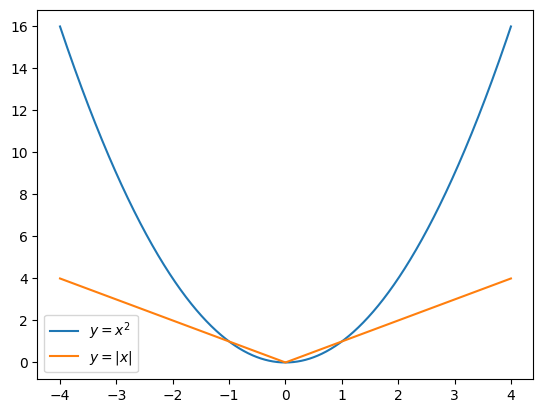

In [7]:
# Create a set of axes.
fig, ax = plt.subplots()

# Create x values.
x = np.linspace(-4.0, 4.0, 1000)

# Plot square function.
ax.plot(x, x**2, label='$y=x^2$')

# Plot cube function.
#ax.plot(x, x**3, label='$y=x^3$')

# Plot absolute value function.
ax.plot(x, np.abs(x), label='$y=|x|$')

# Add a legend.
ax.legend();

The square function is often used in data analytics and machine learning instead of the absolute value function.

It has traditionally been easier mathematically to deal with squaring rather than absolute values.

However, it does mean that differences do not scale linearly.

## Cost Function

In [8]:
def Cost(a, b):
    """Return a cost associated with a guess a for the square root of b."""
    return (a**2 - b)**2

In [9]:
# Print costs for various guesses of the square root of 4.
for x in np.linspace(-4, 4, 9):
    print(f"x={x:6.2f}, Cost={Cost(x, 4):6.2f}")

x= -4.00, Cost=144.00
x= -3.00, Cost= 25.00
x= -2.00, Cost=  0.00
x= -1.00, Cost=  9.00
x=  0.00, Cost= 16.00
x=  1.00, Cost=  9.00
x=  2.00, Cost=  0.00
x=  3.00, Cost= 25.00
x=  4.00, Cost=144.00


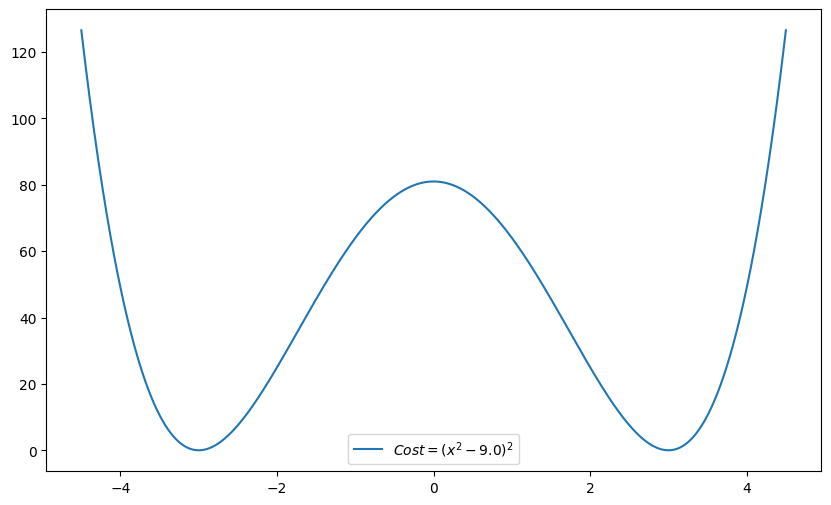

In [10]:
# Plot the cost function for guessing the square root of b.
b = 9.0

# Plot.
fig, ax = plt.subplots(figsize=(10, 6))

# X values.
x = np.linspace(-b / 2.0, b / 2.0, 1000)

# Plot cost function.
ax.plot(x, Cost(x, b), label=f'$Cost=(x^2-{b})^2$')

# Legend.
ax.legend();

## Naive Minimization of the Cost Function

If we find the $x$ value that gives us the minimum value of the cost function, that should be the square root.

We desine cost functions for this to be the case.

Note there are two minima - the positive square root and the negative one.

We will target the positive one.

In [11]:
# Amount to change x by.
dx = 0.01

# Initial guess.
x = 5.0

# Number of iterations.
niter = 1000

for i in range(niter):
    # Current cost.
    c = Cost(x, 11)

    # Cost if we increase x.
    c1 = Cost(x + dx, 11)

    # Cost if we decrease x.
    c2 = Cost(x - dx, 11)

    # Show costs.
    print(f"Iter {i:4d}: x={x:8.4f}, Cost={c:12.6f}, Cost+={c1:12.6f}, Cost-={c2:12.6f}")

    # Update x.
    if c1 < c:
        x += dx
    elif c2 < c:
        x -= dx

# Show costs.
print(f"Iter {i:4d}: x={x:8.4f}, Cost={c:12.6f}, Cost+={c1:12.6f}, Cost-={c2:12.6f}")

Iter    0: x=  5.0000, Cost=  196.000000, Cost+=  198.812820, Cost-=  193.212780
Iter    1: x=  4.9900, Cost=  193.212780, Cost+=  196.000000, Cost-=  190.451040
Iter    2: x=  4.9800, Cost=  190.451040, Cost+=  193.212780, Cost-=  187.714661
Iter    3: x=  4.9700, Cost=  187.714661, Cost+=  190.451040, Cost-=  185.003523
Iter    4: x=  4.9600, Cost=  185.003523, Cost+=  187.714661, Cost-=  182.317506
Iter    5: x=  4.9500, Cost=  182.317506, Cost+=  185.003523, Cost-=  179.656493
Iter    6: x=  4.9400, Cost=  179.656493, Cost+=  182.317506, Cost-=  177.020364
Iter    7: x=  4.9300, Cost=  177.020364, Cost+=  179.656493, Cost-=  174.409001
Iter    8: x=  4.9200, Cost=  174.409001, Cost+=  177.020364, Cost-=  171.822286
Iter    9: x=  4.9100, Cost=  171.822286, Cost+=  174.409001, Cost-=  169.260100
Iter   10: x=  4.9000, Cost=  169.260100, Cost+=  171.822286, Cost-=  166.722326
Iter   11: x=  4.8900, Cost=  166.722326, Cost+=  169.260100, Cost-=  164.208847
Iter   12: x=  4.8800, Cost=

In [12]:
# Final square root estimate.
x

3.320000000000036

## Newton's Method

Motivation: [A Tour of Go Exercise](https://go.dev/tour/flowcontrol/8)

In [13]:
# Let's calculate the square root of x using Newton's method.
x = 63.0

# Initial guess.
z = 1.0

# Improve the guess 10 times.
for i in range(20):
    # Show current values.
    print(f"{i:3d}: z= {z:22.16f}, z^2= {z*z:22.16f}")
    # Improve the guess.
    z -= (z * z - x) / (2 * z)

print(f"End: z= {z:22.16f}, z^2= {z*z:22.16f}")

  0: z=     1.0000000000000000, z^2=     1.0000000000000000
  1: z=    32.0000000000000000, z^2=  1024.0000000000000000
  2: z=    16.9843750000000000, z^2=   288.4689941406250000
  3: z=    10.3468333141674336, z^2=   107.0569596311650429
  4: z=     8.2178263855045390, z^2=    67.5326705022945930
  5: z=     7.9420435756918497, z^2=    63.0760561581881802
  6: z=     7.9372553774489587, z^2=    63.0000229268424121
  7: z=     7.9372539331939036, z^2=    63.0000000000020961
  8: z=     7.9372539331937713, z^2=    62.9999999999999929
  9: z=     7.9372539331937721, z^2=    63.0000000000000071
 10: z=     7.9372539331937713, z^2=    62.9999999999999929
 11: z=     7.9372539331937721, z^2=    63.0000000000000071
 12: z=     7.9372539331937713, z^2=    62.9999999999999929
 13: z=     7.9372539331937721, z^2=    63.0000000000000071
 14: z=     7.9372539331937713, z^2=    62.9999999999999929
 15: z=     7.9372539331937721, z^2=    63.0000000000000071
 16: z=     7.9372539331937713, z^2=    

## numpy's sqrt()

https://en.wikipedia.org/wiki/LAPACK

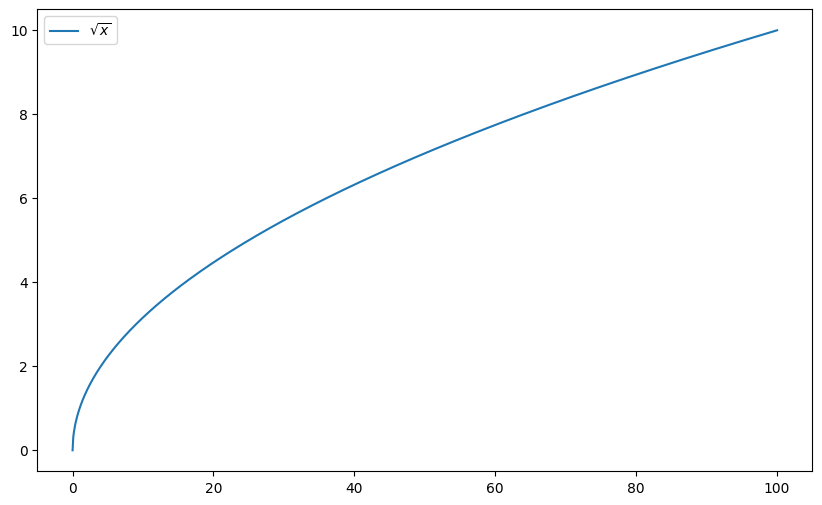

In [16]:
# Plot.
fig, ax = plt.subplots(figsize=(10, 6))

# X values.
x = np.linspace(0.0, 100.0, 1000)

# Plot the function.
ax.plot(x, np.sqrt(x), label=r'$\sqrt{x}$')

# Legend.
ax.legend();

## End